# Importing the Libraries

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import RMSprop

# Loading the Dataset

In [35]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

# Normalizing the Data

In [36]:
X_train = X_train.reshape(60000,28,28,1)/255.0
X_test = X_test.reshape(10000,28,28,1)/255.0

# Creating a Model

In [37]:
model = Sequential()
model.add(layers.Conv2D(64,(3,3),activation = "relu",input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = "relu"))
model.add(layers.Dense(10,activation = "softmax"))

# Compiling the Model

In [38]:
model.compile(optimizer=RMSprop(lr = 0.001),loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

# Fitting the Data

In [39]:
model.fit(X_train,Y_train,epochs = 30,batch_size= 128)

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.8011 - accuracy: 0.7091
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3668 - accuracy: 0.8669
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3041 - accuracy: 0.8885
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2693 - accuracy: 0.8998
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2477 - accuracy: 0.9083
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2221 - accuracy: 0.9186
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2056 - accuracy: 0.9249
Epoch 8/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1928 - accuracy: 0.9296
Epoch 9/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1784 - accuracy: 0.9347
Epoch 10/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1639 - accuracy: 0.9392

# Evaluating the Model on test Data set

In [40]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.9103


[0.5042542219161987, 0.9103000164031982]

# Looking at some pictures in dataset

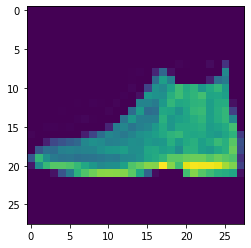

It is Ankle Boot and model predicted it as a Ankle Boot


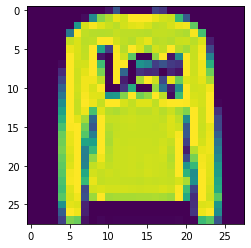

It is Pullover and model predicted it as a Pullover


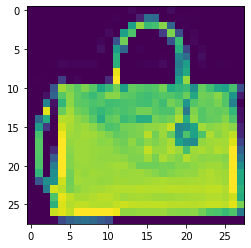

It is Bag and model predicted it as a Bag


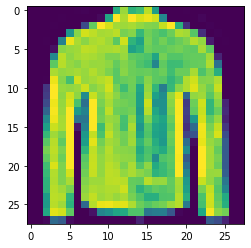

It is Coat and model predicted it as a Coat


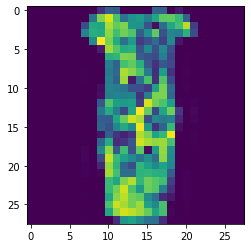

It is Dress and model predicted it as a Dress


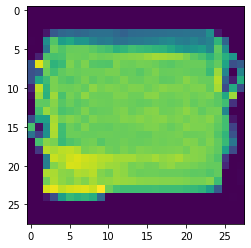

It is Bag and model predicted it as a Bag


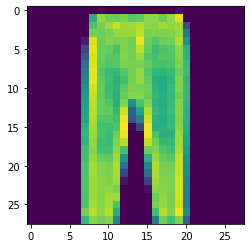

It is Trouser and model predicted it as a Trouser


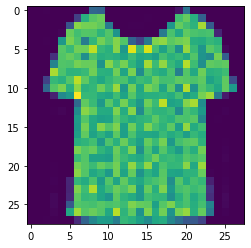

It is T-shirt/top and model predicted it as a Shirt


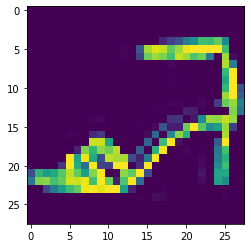

It is Sandal and model predicted it as a Sandal


In [65]:
for i in [0,1, 30, 50, 100, 134, 590 , 1000 , 9987]:
  Map_dictionary = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal" , 6: "Shirt",7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
  image = X_test[i,:].reshape(28,28)
  plt.imshow(image)
  plt.show()
  predict = model.predict(X_test)
  print("It is "+Map_dictionary[Y_test[i]] + " and model predicted it as a " + Map_dictionary[np.argmax(predict[i])])
